In [1]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import pywt
import math
from scipy.signal import butter, lfilter
from scipy.fftpack import fft, ifft
from sklearn import preprocessing
import math
from sklearn.metrics import confusion_matrix
import itertools
from numpy.random import permutation
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange
from scipy.signal import find_peaks
from scipy import signal
from numpy import convolve

In [2]:
fileName=['a01','a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20',
         'b01','b02','b03','b04','b05','c01','c02','c03','c04','c05','c06','c07','c08','c09','c10',
         'x01','x02','x03','x04','x05','x06','x07','x08','x09','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
mypath='C:/Users/sara/Documents/5anno/TESI/DataBase_PhysioNet/www.physionet.org/physiobank/database/apnea-ecg/'


In [383]:
index=22
recordname=mypath+fileName[index]
ann = wfdb.rdann(recordname, extension="apn")
time_apn=ann.sample/100
apn=ann.symbol

df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
recordname=mypath+fileName[index]
record = wfdb.rdsamp(recordname)
dfECG=pd.DataFrame()
ecg=record[0]
Fs_ecg=record[1]['fs']
intervallo=len(ecg)/(len(ecg)*Fs_ecg)
time_ecg=[]
for i in range(0,len(ecg)):
    time_ecg.append(intervallo*i)
dfECG['time']=time_ecg
dfECG['ecg']=ecg

df_ecg = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'ecg_corretto.pkl')

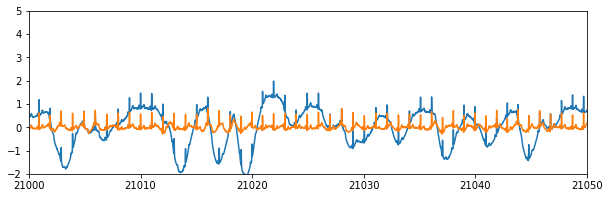

In [384]:
plt.figure(figsize=(10,3))
plt.axis([21000,21050,-2,5])
plt.plot(time_ecg,ecg)
#plt.plot(df_ecg['time'],df_ecg['ecg'])
plt.plot(df_ecg['time'],df_ecg['ecg'])

In [385]:
RR_intervals=df['rr']
time_rr=df['time']

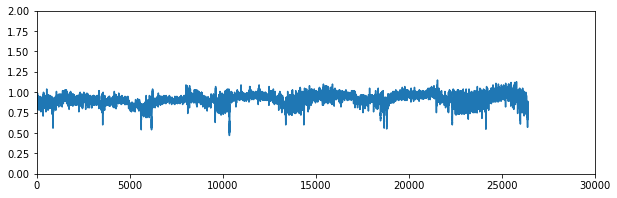

In [386]:
plt.figure(figsize=(10,3))
plt.axis([0,30000,0,2])

#plt.plot(timeRR,RR)
plt.plot(time_rr,RR_intervals)
#plt.plot(time_apn,apn)

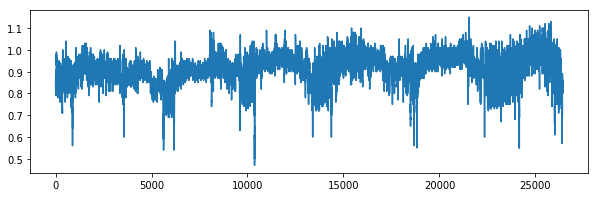

In [387]:
plt.figure(figsize=(10,3))

#plt.axis([0,30000,0.4,1.2])

#plt.plot(timeRR,RR)
plt.plot(time_rr,RR_intervals)


In [388]:
'''avg=statistics.mean(RR_intervals[:-1])
RR=[]
timeRR=[]
i=0
while (i<len(RR_intervals)-1):
    somma=RR_intervals[i]+RR_intervals[i+1]
    diff=abs(somma-avg)
    if(abs(diff)>abs(avg-RR_intervals[i])):
        RR.append(RR_intervals[i])
        timeRR.append(time_rr[i])
        i=i+2
    else:
        RR.append(somma)
        timeRR.append(time_rr[i])
        i=i+1'''

'avg=statistics.mean(RR_intervals[:-1])\nRR=[]\ntimeRR=[]\ni=0\nwhile (i<len(RR_intervals)-1):\n    somma=RR_intervals[i]+RR_intervals[i+1]\n    diff=abs(somma-avg)\n    if(abs(diff)>abs(avg-RR_intervals[i])):\n        RR.append(RR_intervals[i])\n        timeRR.append(time_rr[i])\n        i=i+2\n    else:\n        RR.append(somma)\n        timeRR.append(time_rr[i])\n        i=i+1'

In [389]:
'''th_up=statistics.mean(RR[:-1])+3*statistics.stdev(RR[:-1])
th_dwn=statistics.mean(RR[:-1])-3*statistics.stdev(RR[:-1])
for i in range (0,len(RR)):
    if(RR[i]>th_up):
        RR[i]=th_up
    if(RR[i]<th_dwn):
        RR[i]=th_dwn'''

'th_up=statistics.mean(RR[:-1])+3*statistics.stdev(RR[:-1])\nth_dwn=statistics.mean(RR[:-1])-3*statistics.stdev(RR[:-1])\nfor i in range (0,len(RR)):\n    if(RR[i]>th_up):\n        RR[i]=th_up\n    if(RR[i]<th_dwn):\n        RR[i]=th_dwn'

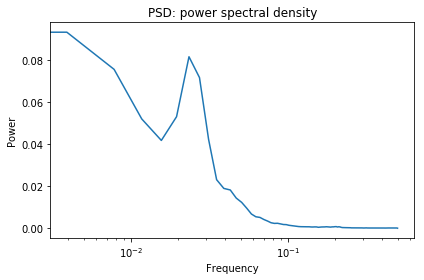

In [390]:
df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
freqs, psd = signal.welch(RR_intervals)


plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

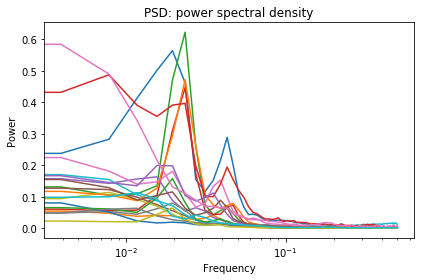

In [391]:
f=[]
p=[]
for index in range (0,20):
   # print(index)
    df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
    freqs, psd = signal.welch(df['rr'])
    f.append(freqs)
    p.append(psd)
for i in range(0,len(f)):
    plt.semilogx(f[i], p[i])
    plt.title('PSD: power spectral density')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()
df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'RR.pkl')


In [392]:
mediaA=[]
for i in range(0,len(p[0])):
    somma=0
    for k in range (0,19):
        somma=somma+p[k][i]
    mediaA.append(somma/19)

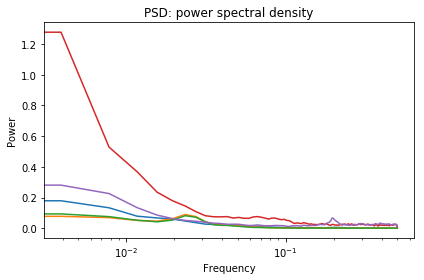

In [393]:
f=[]
p=[]
for index in range (20,25):
   # print(index)
    df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
    freqs, psd = signal.welch(df['rr'])
    f.append(freqs)
    p.append(psd)
for i in range(0,len(f)):
    plt.semilogx(f[i], p[i])
    plt.title('PSD: power spectral density')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()

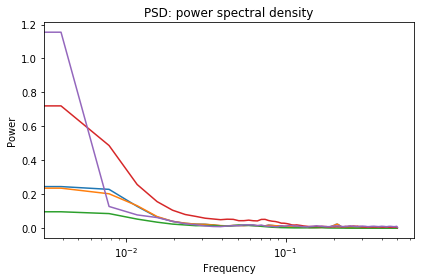

In [394]:
f=[]
p=[]
for index in range (29,34):
   # print(index)
    df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
    freqs, psd = signal.welch(df['rr'])
    f.append(freqs)
    p.append(psd)
for i in range(0,len(f)):
    plt.semilogx(f[i], p[i])
    plt.title('PSD: power spectral density')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()

In [395]:
#df = pd.read_pickle(mypath+'RR-EDR/'+fileName[2]+'RR.pkl')
RR_intervals
lista=RR_intervals[:-1]
meanHRV=statistics.mean(RR_intervals)
#print(meanHRV)
l=len(lista)
lista=lista.tolist()
for i in range (0,65536-l):
    lista.append(.0)
# print(len(lista))
#lista=[1,2,3,4,5,6]
dft= fft(lista)
freq = np.fft.fftfreq(len(lista))
PSD = np.abs(dft) ** 2

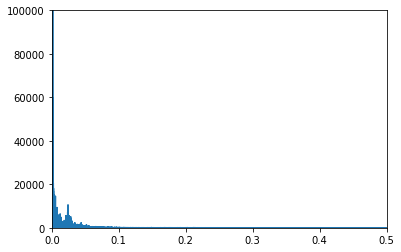

In [396]:
plt.axis([0,0.5,0.4,100000])
plt.plot(freq,PSD)
PSD64=[]
for i in range (0,64):
        PSD64.append(statistics.mean(PSD[1024*i:1024*(i+1)]))
freq64=[]
for i in range (0,64):
        freq64.append(statistics.mean(freq[1024*i:1024*(i+1)]))

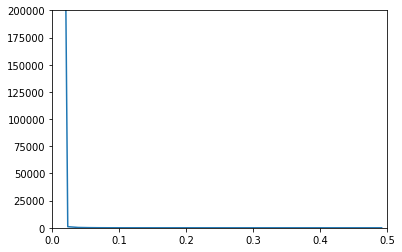

In [397]:
plt.axis([0,0.5,0.4,200000])
plt.plot(freq64[0:32],PSD64[0:32])

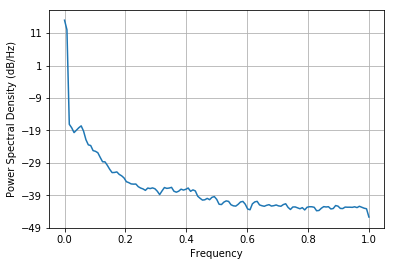

In [398]:
PSD,freq=plt.psd(lista)
len(PSD)
for i in range (0,64):
        freq64.append(statistics.mean(freq[2*i:2*(i+1)]))
for i in range (0,64):
        PSD64.append(statistics.mean(PSD[2*i:2*(i+1)]))

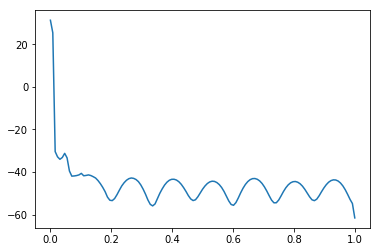

In [399]:
plt.plot(freq,PSD_DB)

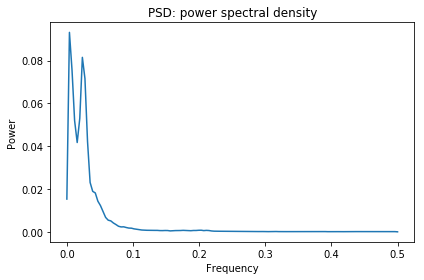

In [400]:

freqs, psd = signal.welch(RR_intervals)

plt.plot(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

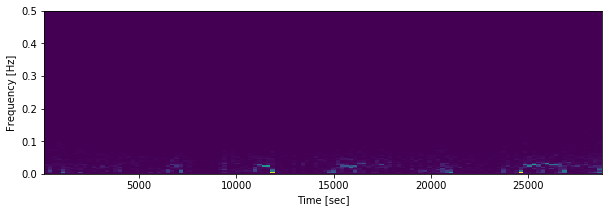

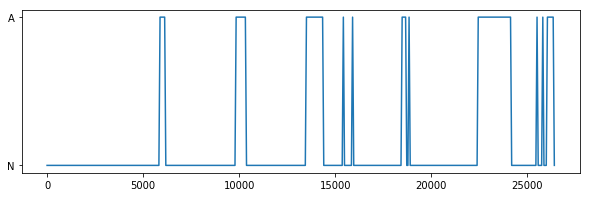

In [402]:
f, t, Sxx = signal.spectrogram(RR_intervals)
plt.figure(figsize=(10,3))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.plot(time_apn,apn,'r')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(time_apn,apn)

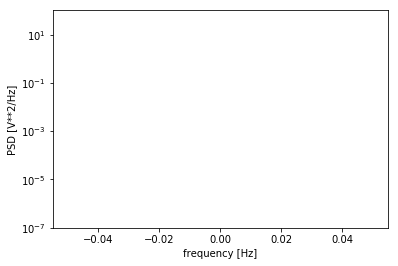

In [403]:
f, Pxx_den = signal.periodogram(RR_intervals)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()